## Sommaire

- __Imports__
- __Unit tests__
- __What class test__
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt__	
    	Accuracy de 94% au centre
- __Accuracy Map de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt__
        Ok
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_10h47.pt__
        Ne fonctionne pas (accuracy à 11%)
- __Essais Ligne posteriorTest() sur MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt__
        ok
- __AccuracyLign_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_13h07.txt__
        ok. Reste à voir pourquoi ce comportement sur les bords.
- __Test Script 2019-06-13_Marion_5tentativesParStd.py nouvelle version__
        Le script ne bugue pas de mémoire
- __Script pour apprentissages successifs à std croissant pour un même réseau__
        Le script ne bugue pas de mémoire.
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_1epoques_2019-06-14_14h32.pt__
        Std croissants. Le réseau fonctionne (77%)
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-14_15h00.pt__
        Std croissants. Le réseau fonctionne (84%) + affichage courbes
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_10h20.pt__
        Ne fonctionne pas (accuracy à 10%)
- __Comparaison entre les optimiseurs Adam, SGD, Adagrad et Adadelta__
        Adadelta semble meilleur
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_16h54.pt__
        réseau 60 époques adadelta, fonctionne finalement à 82%
- __Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt__
        Std croissants.	Le réseau fonctionne (accuracy à 81%)

## Imports

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
import matplotlib.pyplot as plt

In [4]:
from PIL import Image

In [5]:
import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [6]:
from main import init
args = init(filename='../data/2019-06-12')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'what_offset_std': 5.0,
 'what_offset_max': 15}

## Unit tests

In [6]:
transform=transforms.Compose([
                               WhatShift(args, i_offset=None, j_offset=None),
                               WhatBackground(),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [7]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [9]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [10]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [11]:
data, label = next(iter(test_loader))

In [12]:
label.shape

torch.Size([100])

Text(0.5, 1.0, 'label : 2')

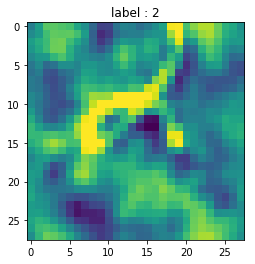

In [13]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

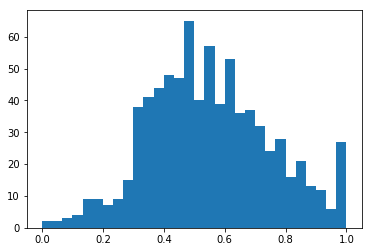

In [14]:
h = plt.hist(data[1,:,:].detach().numpy().flatten(), 30)

In [15]:
device = 'cpu'
model = WhatNet(args).to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [16]:
if False:
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, loss_func, optimizer, epoch)
        test(args, model, device, test_loader)

## What class test

In [17]:
if False :
    import sys
    sys.path.append("../figures")

    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

    from main import init
    args = init(filename='../data/2019-06-12')

    args.epochs = 2
    args.save_model = False

    args.do_adam = False
    args.what_offset_std = 2.0
    what = What(args=args, force= True)


## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt

In [21]:
# model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7.pt")
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt")
transform = transforms.Compose([
    WhatShift(args, i_offset=0, j_offset=0),
    WhatBackground(),
    transforms.ToTensor(),
    # transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)
if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0022, Accuracy: 9447/10000 (94%)



## Accuracy Map de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt

Le maximum d'accuracy est de  0.9465  au centre.


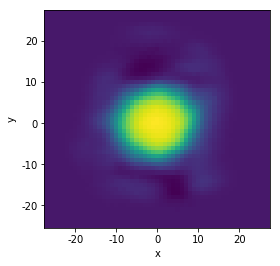

In [11]:
pathAccuracyMapTxt = '../dev/AccuracyMap_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-12_16h11.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=53)

plt.xlabel("x")
plt.ylabel("y")

plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])
plt.yticks([i for i in range(7,55,10)], [i for i in range(20,-25,-10)])

plt.imshow(file)

print("Le maximum d'accuracy est de ", np.amax(file), " au centre.")

In [22]:
## ouverture du txt et enregistrement en format numpay array .npy

In [7]:
if False :
    pathDuFichierTxt = '../dev/'
    nomDuFichierTxt = 'AccuracyMap_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-12_16h11.txt'
    nouveauNom = nomDuFichierTxt[0:-4] + ".npy"


    file = np.loadtxt(pathDuFichierTxt + nomDuFichierTxt, max_rows=55)


    np.save(nouveauNom, file)


In [8]:
## affichage du numpy array

In [10]:
if False :
    AccuracyMap = np.load(nouveauNom)

    plt.imshow(AccuracyMap)

## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_10h47.pt

In [20]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_10h47.pt")

"""
transform = transforms.Compose([
    WhatShift(args, i_offset=None, j_offset=None),
    WhatBackground(),
    transforms.ToTensor(),
    # transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)
"""
transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)



if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)



## Essais Ligne posteriorTest() sur MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt

In [3]:
if False :
    import torch
    from torchvision import datasets, transforms
    import sys
    sys.path.append("../figures")
    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    import datetime
    from main import init
    args = init(filename='../data/2019-06-12')
    args


    debut = datetime.datetime.now()
    date = str(debut)

    reseau = "MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt"
    borne = 1


    f = open('AccuracyMap_{}_{}_{}h{}.txt'.format(reseau[0:-3], date[0:10], date[11:13], date[14:16]), "w+")
    compteur = 0

    ligne_test_posterior = ''
    ligne_correct = ''

    model = torch.load("../data/"+ reseau)
    accuracy_map = torch.zeros(55,55)
    for i_offset in range(-borne, borne + 1):
        transform = transforms.Compose([
            WhatShift(args, i_offset=i_offset, j_offset=0),
            WhatBackground(),
            transforms.ToTensor(),
            # transforms.Normalize((args.mean,), (args.std,))
        ])
        dataset_test = MNIST('../data',
                                      train=False,
                                      download=True,
                                      transform=transform,
                                      )
        test_loader = torch.utils.data.DataLoader(dataset_test,
                                                  batch_size=args.minibatch_size,
                                                  shuffle=True)
        whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
        test_posterior, correct = whatTrainer.posteriorTest()

        print("Avancement : ", float(int((compteur/(2*borne+1)*100)*100))/100, "%")
        compteur += 1
        # print(acc)
        # accuracy_map[26-i_offset][26-j_offset] = acc

        ligne_test_posterior += str(int(test_posterior*10000)/10000) + " "
        ligne_correct += str(correct) + " "

    f.write(ligne_test_posterior +"\n"+ ligne_correct)
    f.write("\n1ere ligne : ligne_test_posterior; 2eme ligne : ligne_correct")


    fin = datetime.datetime.now()

    f.write("\nDuree d'execution : " + str(fin-debut))

    f.close()



Test set: Max posterior average: 0.9722, Accuracy: 0.9465

Avancement :  0.0 %

Test set: Max posterior average: 0.9714, Accuracy: 0.9447

Avancement :  33.33 %

Test set: Max posterior average: 0.9710, Accuracy: 0.9394

Avancement :  66.66 %


## AccuracyLign_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_13h07.txt

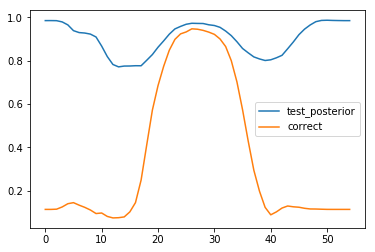

In [27]:

pathAccuracyMapTxt = '../dev/AccuracyLign_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_13h07.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=2)
plt.plot(file.T)
plt.legend(['test_posterior', 'correct'])

## Test Script 2019-06-13_Marion_5tentativesParStd.py nouvelle version

In [6]:
if False :
    import sys
    import datetime
    sys.path.append("../figures")
    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    from main import init
    args = init(filename='../data/2019-06-12')

    args.epochs = 1
    args.save_model = False

    debut = datetime.datetime.now()
    date = str(debut)

    #f = open('5tentativesParStd_{}_{}h{}.txt'.format(date[0:10], date[11:13], date[14:16]), "w+")

    liste_std = [i/2 for i in range(0,11)]

    #f.write("fichier de parametres utilise : 2019-06-12_param\n\n")
    print("fichier de parametres utilise : 2019-06-12_param\n\n")

    for std in liste_std :
        # f.write("Pour std = " + str(std) + "\n")
        print("Pour std = " + str(std) + " :\n")
        for i in range(5):
            args.what_offset_std = std
            what = What(args=args, force=True, seed=i)
            print("\n")


    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : "+str(fin-debut))

fichier de parametres utilise : 2019-06-12_param


Pour std = 0.0 :

Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.323626
Train Epoch: 1/1 [10000/60000 (17%)]	Loss: 1.384019
Train Epoch: 1/1 [20000/60000 (33%)]	Loss: 1.034799
Train Epoch: 1/1 [30000/60000 (50%)]	Loss: 0.794889
Train Epoch: 1/1 [40000/60000 (67%)]	Loss: 0.717319
Train Epoch: 1/1 [50000/60000 (83%)]	Loss: 0.639454

Test set: Average loss: 0.0069, Accuracy: 7704/10000 (77%)

../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_1epoques_2019-06-14_10h27.pt


Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.299475
Train Epoch: 1/1 [10000/60000 (17%)]	Loss: 0.820568
Train Epoch: 1/1 [20000/60000 (33%)]	Loss: 0.654663
Train Epoch: 1/1 [30000/60000 (50%)]	Loss: 0.387473
Train Epoch: 1/1 [40000/60000 (67%)]	Loss: 0.547664
Train Epoch: 1/1 [50000/60000 (83%)]	Loss: 0.231088

Test set: Average loss: 0.0027, Accuracy: 9176/10000 (92%)

../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_1epoques_2019-06-14_10h27.pt


Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.2

KeyboardInterrupt: 

## Script pour apprentissages successifs à std croissant pour un même réseau

In [15]:
if False :
    import sys
    import datetime
    sys.path.append("../figures")
    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    from main import init
    args = init(filename='../data/2019-06-12')

    args.epochs = 1 # 10 plus tard
    args.save_model = True

    debut = datetime.datetime.now()
    date = str(debut)

    liste_std = [i for i in range(0,6)] # pas de 0.5 de std 

    what = What(args=args, force=True, seed = 0)

    seed = 1
    for std in liste_std :
        print("Pour std = " + str(std) + " :\n")

        args.what_offset_std = std
        what = What(args=args, model = what.model, force=True, seed=seed)
        seed += 1
        print("\n")


    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : "+str(fin-debut))



## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7_1epoques_2019-06-14_14h32.pt

In [18]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_1epoques_2019-06-14_14h32.pt")

transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)


whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
acc = whatTrainer.test()


Test set: Average loss: 0.0069, Accuracy: 7689/10000 (77%)



Ci-dessus : performances d'un script avec entrainement à std croissants, une période d'entrainement par std.

## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-14_15h00.pt

In [11]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-14_15h00.pt")

transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)

whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
acc = whatTrainer.test()


Test set: Average loss: 0.0054, Accuracy: 8402/10000 (84%)



In [12]:
data, label = next(iter(test_loader))

Text(0.5, 1.0, 'label : 0')

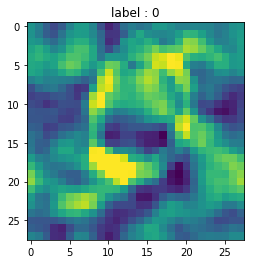

In [13]:
i = 5
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

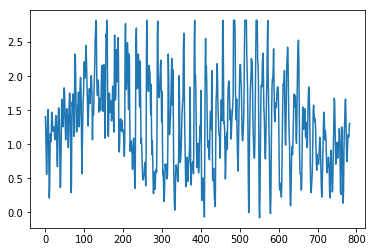

In [14]:
plt.plot(data[i,:,:].detach().numpy().flatten())

In [15]:
output = model(data)

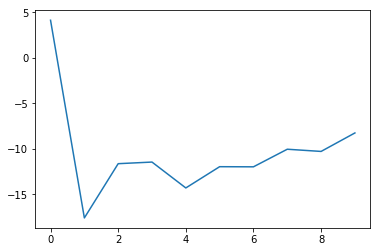

In [16]:
plt.plot(output[i,:].detach().numpy())

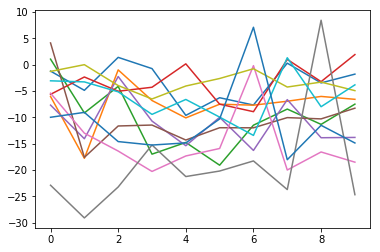

In [17]:
for i in range(11):
    plt.plot(output[i,:].detach().numpy())
    

## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_10h20.pt

In [10]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_10h20.pt")


transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)

if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0230, Accuracy: 1009/10000 (10%)



## Comparaison entre les optimiseurs Adam, SGD, Adagrad et Adadelta

In [3]:
import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

from main import init
args = init(filename='../data/2019-06-12')

args.epochs = 1
args.save_model = False



args.what_offset_std = 3.0

args.lr = 0.001 # 2019-06-11_17h37_Marion_EffetsVariationsParametres.txt + https://pytorch.org/docs/stable/_modules/torch/optim/adam.html
args.do_adam = "adam"
what = What(args=args, force=True, seed=3)

args.lr = 0.1 # example https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html
args.do_adam = 'sgd'
what = What(args=args, force=True, seed=3)

args.lr = 0.01 # https://pytorch.org/docs/stable/_modules/torch/optim/adagrad.html
args.do_adam = 'adagrad'
what = What(args=args, force=True, seed=3)

args.lr = 1 # https://pytorch.org/docs/stable/_modules/torch/optim/adadelta.html
args.do_adam = 'adadelta'
what = What(args=args, force=True, seed=3)


Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.300121
Train Epoch: 1/1 [10000/60000 (17%)]	Loss: 1.732020
Train Epoch: 1/1 [20000/60000 (33%)]	Loss: 1.760970
Train Epoch: 1/1 [30000/60000 (50%)]	Loss: 1.391137
Train Epoch: 1/1 [40000/60000 (67%)]	Loss: 1.179641
Train Epoch: 1/1 [50000/60000 (83%)]	Loss: 1.063285

Test set: Average loss: 0.0105, Accuracy: 6468/10000 (65%)

Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.300121
Train Epoch: 1/1 [10000/60000 (17%)]	Loss: 1.978343
Train Epoch: 1/1 [20000/60000 (33%)]	Loss: 2.042536
Train Epoch: 1/1 [30000/60000 (50%)]	Loss: 1.646296
Train Epoch: 1/1 [40000/60000 (67%)]	Loss: 1.380218
Train Epoch: 1/1 [50000/60000 (83%)]	Loss: 1.317984

Test set: Average loss: 0.0105, Accuracy: 6443/10000 (64%)

Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.300121
Train Epoch: 1/1 [10000/60000 (17%)]	Loss: 1.927759
Train Epoch: 1/1 [20000/60000 (33%)]	Loss: 1.927866
Train Epoch: 1/1 [30000/60000 (50%)]	Loss: 1.486630
Train Epoch: 1/1 [40000/60000 (67%)]	Loss: 1.345485
Train Epo

## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_16h54.pt

Réseau avec optimisateur adadelta

In [9]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_60epoques_2019-06-17_16h54.pt")

transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)


if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0208, Accuracy: 8177/10000 (82%)



## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

Réseau entrainé avec std croissants

In [8]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt")
transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)


if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0065, Accuracy: 8126/10000 (81%)

